In [13]:
import sys
sys.path.append("../../")
from cathub.pet_barriers import *
%matplotlib inline


## (1) We performed DFT single point calculations of H/Pt(111) on a top site at varying Pt--H distance:
## Setting up the Pt---H Morse potential.
Note that the proton initial state here is "left", i.e. the hydrogen is ABOVE the Pt surface.
The program can read in the data, normalize them and fit a Morse potential, just with a few lines of code.

## (2) Setting up $H_{3}O^{+}$ and $H_{2}O$
For H2O and H3O+, we have the Morse-potential parameters in the module's data base. Thus we can instantiate it from there.
Alternatively, you can supply a series of single points, as in point (1).
Note that then, the proton initial state is "right", i.e. the hydrogen is BELOW the water molecule.

We read in the data and check the Morse potential with plot=True:


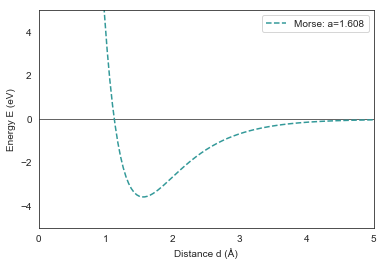

In [11]:
# Instantiate first state. The hydrogen is stripped off above the Pt surface, so we use donor='left'.
pes1 = PES.init_from_file(filepath='../../data/Pt.tsv', 
           position='left', 
           d_Heq=1.56)
pes1.plot_morse()

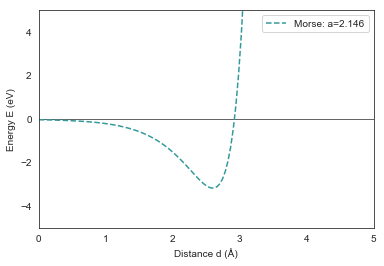

In [10]:
# Instantiate second state. The hydrogen is stripped off below water, so we use donor='right'.
pes2 = PES.init_from_database(proton_donor='H3O+',
           position='right', 
           d_Heq=2.6)
pes2.plot_morse()
# We have now two potential energy curve (PES) objects

In order to transfer the hydrogen from one state (pes1) to the other (pes2), 
we instantiate the Energy object, giving it first the PES, we want to see on the left,
and then the PES we want to see on the right.

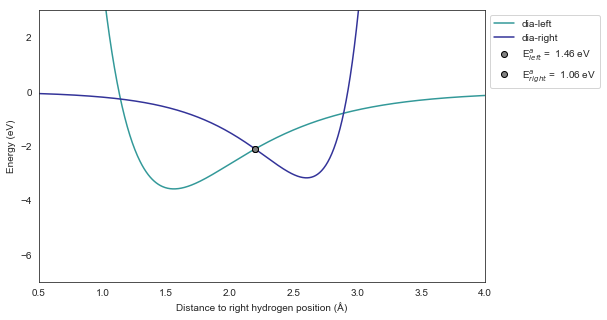

Diabatic forward barrier  1.46 eV
Diabatic backward barrier  1.06 eV
Adiabatic forward barrier  1.18 eV
Adiabatic backward barrier  0.77 eV


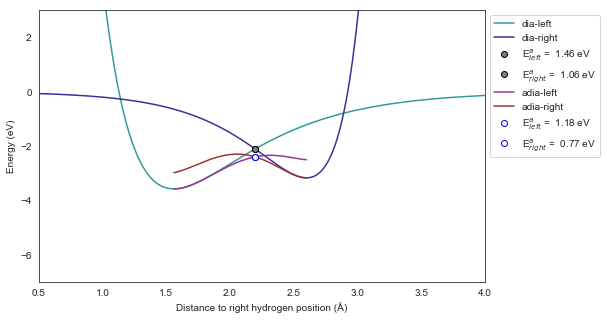

In [12]:
# Instantiate the Energy class to compute interceptions.
e = Energy(pes1, pes2)

# Compute and plot diabatic interception:
transition_state = e.interception(plot=True,
                                  ylim=(-7, 3))      # returns distance from first state and forward Ea
print('Diabatic forward barrier %5.2f eV' %e.Ea_left)
print('Diabatic backward barrier %5.2f eV' %e.Ea_right)

# We get the adiabatic barrier estimate like this:
e.interception(adiabatic=True, 
               plot=True,
               ylim=(-7, 3))
print('Adiabatic forward barrier %5.2f eV' %e.Ea_ad_left)
print('Adiabatic backward barrier %5.2f eV' %e.Ea_ad_right)
